## Lab 4: Working with 'real' data

In [59]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

In [3]:
hf = h5py.File('gammaray_lab4.h5', 'r')

In [4]:
hf.keys()

<KeysViewHDF5 ['data']>

In [5]:
data = np.array(hf.get('data'))

In [16]:
data[:,0]

array([9.40680016e+08, 3.15000000e+02, 4.50000000e+01, 1.00000000e+01])

In [7]:
hf.close()

### Problem 1

Data from a gamma-ray satellite. Take in readings every 100 milliseconds, in an approximately 90 minute orbit. Virtually all data collected is background cosmic rays.

#### 1)
Make plots to generally explore the data, give a high level description of data features, comment on signal contamination, and how you plan on building the background pdf().

Provided data 'hf' contains 4 columns: 
 - time(in gps seconds) 
 - solar phase(in degrees) - position of sun relative to orbit 
 - earth longitude(in degrees) - giving position of spacecraft relative to the ground 
 - paricle counts

Plotting the entire data set will normally crash the kernel due to the sheer volume of data points, hence why I chose to plot only 1 in every hundred thousand data points. The first plot is the relationship between time in gps seconds and position of the sun relative to orbit in degrees.

The unit of gps seconds is based on the continuous time scale of atomic clocks(no leap seconds). In the case of our graph we are dealing with numbers of 9.41 * 10^8 gps seconds. The difference in 0.005 gps seconds between tick marks, is approximately equivalent to 5.8 days in time. From this information we can see that the position of the sun relative to the orbit follows an oscillatory motion, where the phase changes from 0 to 360 degrees, and has a period of 0.005 gps seconds. 

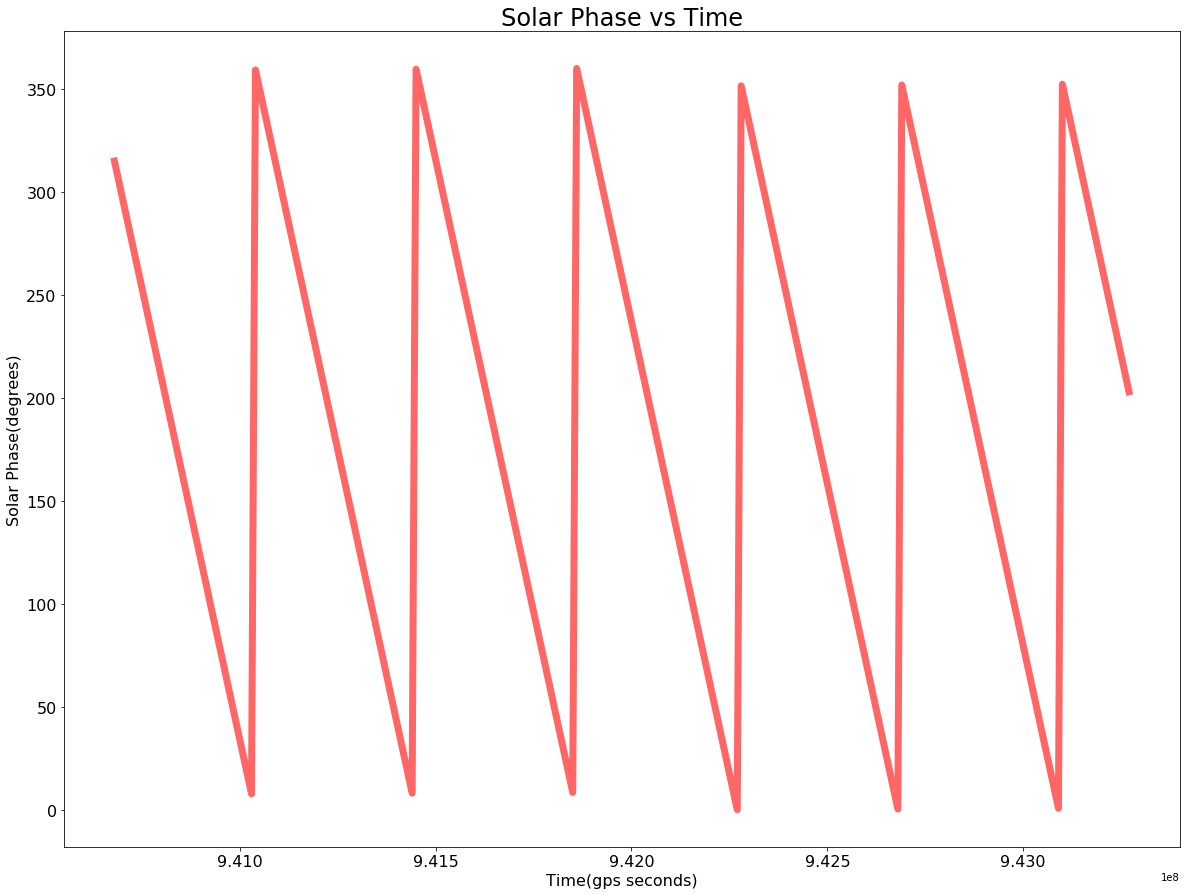

In [60]:
fig, ax = plt.subplots(1, 1)

ax.plot(data[0,::100000], data[1,::100000],
       'r', lw=7, alpha=0.6)
plt.tick_params(labelsize = 16)
plt.title("Solar Phase vs Time"
          ,fontsize=24)
plt.xlabel("Time(gps seconds)", fontsize = 16)
plt.ylabel('Solar Phase(degrees)', fontsize = 16)
plt.show()

This shows us the relationships between time in gps seconds and the location of the satellite in degrees longitude. As seen here using the original ratio of one data point for every 100,000 creates a really condensed graph. This is because the satellite orbits the earth once every 90 minutes, which is considerably faster than the changing of the position of the sun relative to the orbit. Changing it to 1 in every million we can get a better visualization of the longitudinal values of the satellite.

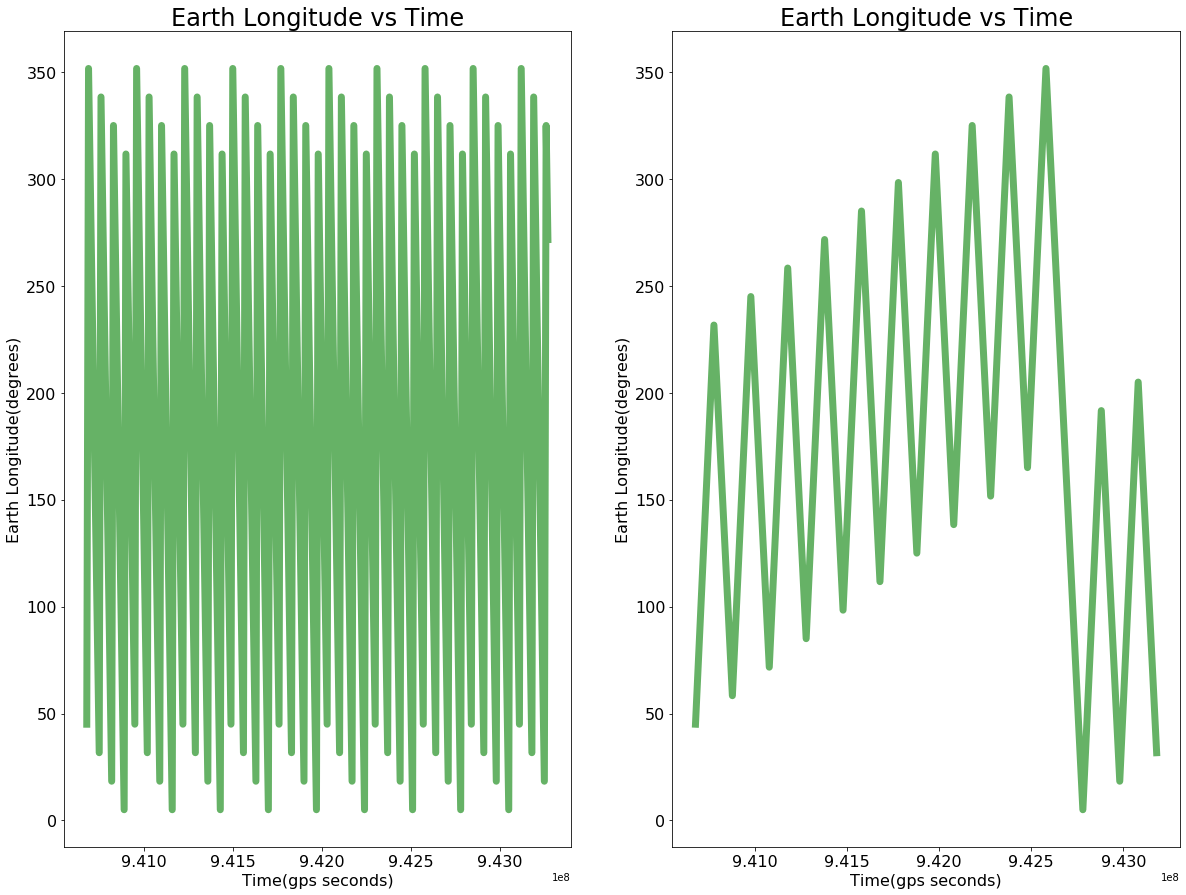

In [58]:
plt.rcParams["figure.figsize"] = (20,15)

plt.subplot(1,2,1)
plt.title("Earth Longitude vs Time"
          ,fontsize=24)
plt.xlabel("Time(gps seconds)", fontsize = 16)
plt.ylabel('Earth Longitude(degrees)', fontsize = 16)
plt.tick_params(labelsize = 16)
plt.plot(data[0,::100000], data[2,::100000],
       'g', lw=7, alpha=0.6)

plt.subplot(1,2,2)
plt.title("Earth Longitude vs Time"
          ,fontsize=24)
plt.xlabel("Time(gps seconds)", fontsize = 16)
plt.ylabel('Earth Longitude(degrees)', fontsize = 16)
plt.tick_params(labelsize = 16)
plt.plot(data[0,::1000000], data[2,::1000000],
       'g', lw=7, alpha=0.6)

plt.show()

Finally this plot shows us the observed particle counts and the time in gps seconds. Since this is a low earth orbit satellite, a lot of the particles detected are being blocked by the earth itself. Some causes of signal contamination is instrumentation malfunctioning, as well as the gamma-ray bursts being blocked from the sun and the moon. 

Since we are describing the probability of a given number of events occurring in a fixed interval of time(particle count detection every 100 milliseconds), I believe a poisson distribution will be able to accurately describe the background of cosmic rays in our pdf.

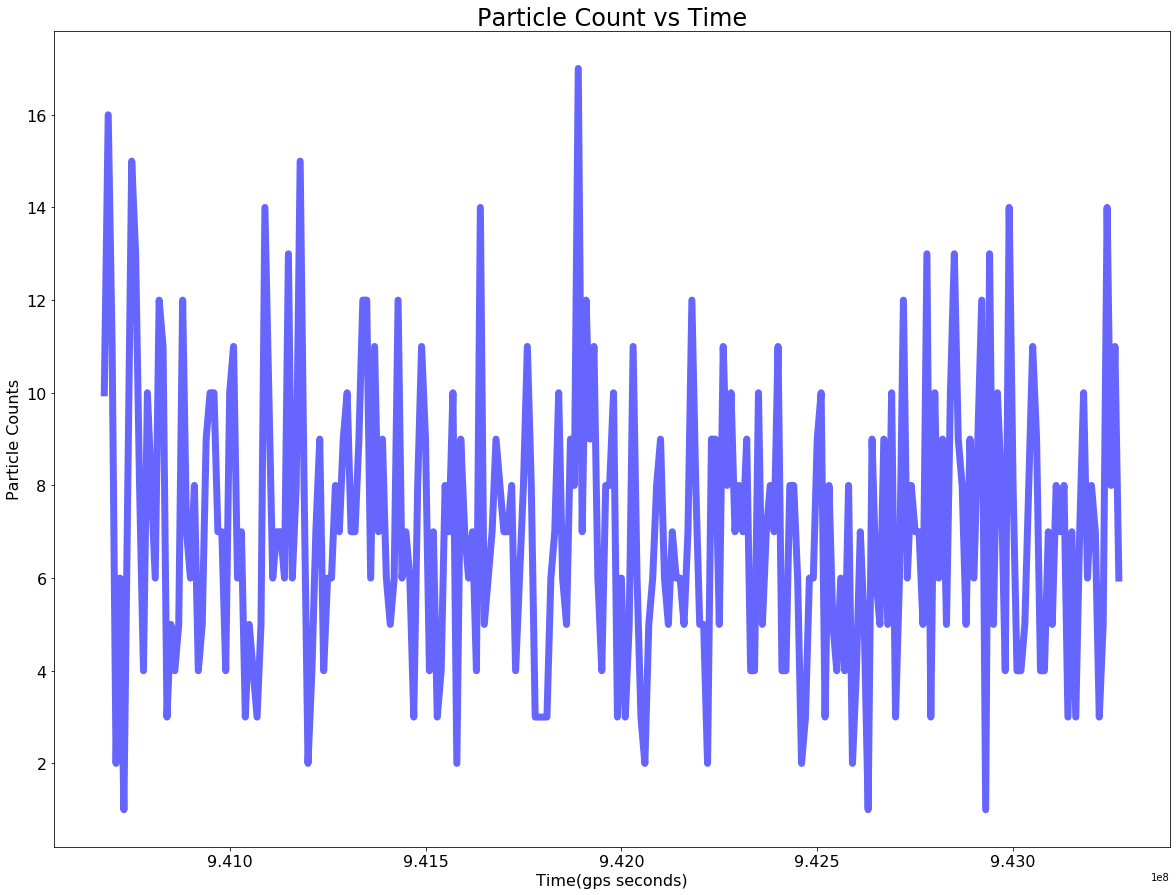

In [61]:
fig, ax = plt.subplots(1, 1)

ax.plot(data[0,::100000], data[3,::100000],
       'b', lw=7, alpha=0.6)
plt.tick_params(labelsize = 16)
plt.title("Particle Count vs Time"
          ,fontsize=24)
plt.xlabel("Time(gps seconds)", fontsize = 16)
plt.ylabel('Particle Counts', fontsize = 16)
plt.show()

#### 2)
Find and describe background changes and inconsistencies.

Each column across the data set measures something vastly different. 

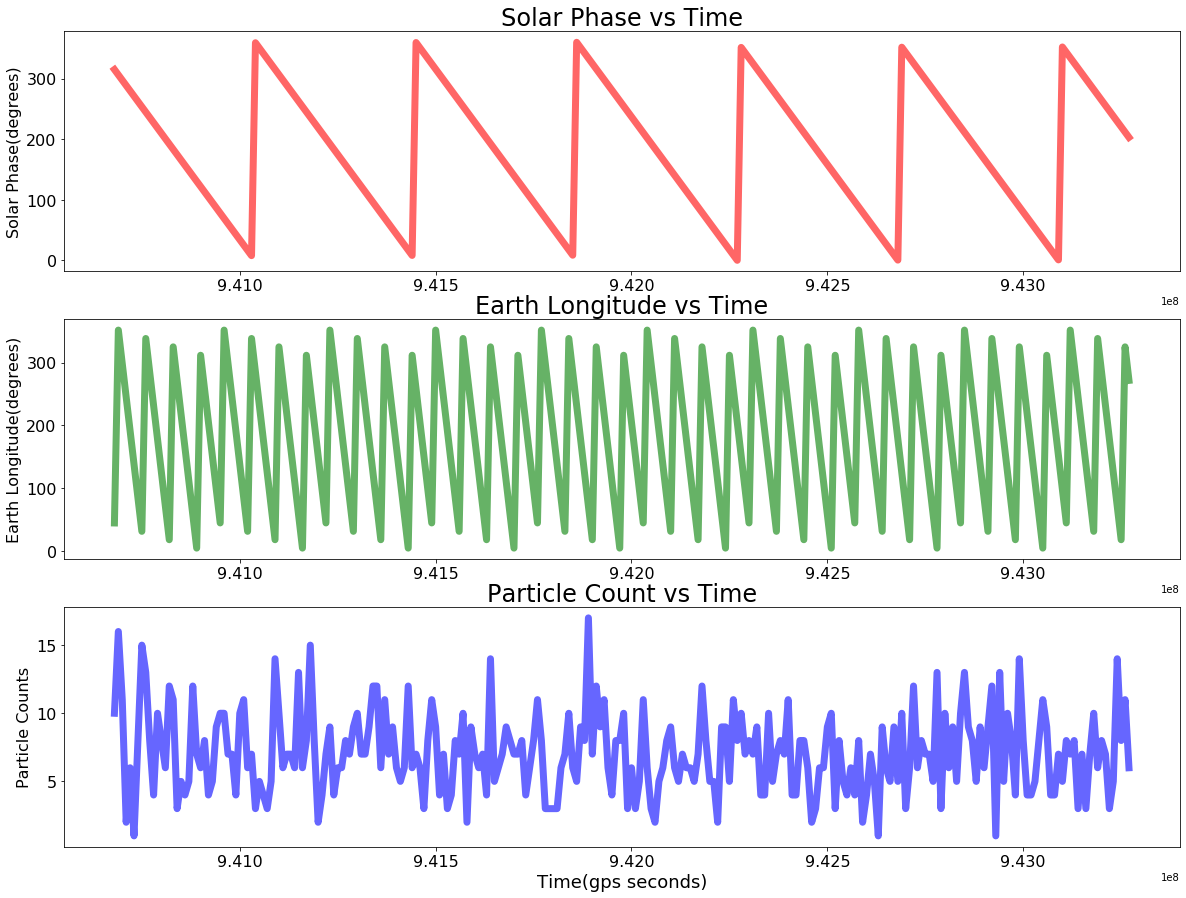

In [75]:
plt.rcParams["figure.figsize"] = (20,15)

plt.subplot(3,1,1)
plt.title("Solar Phase vs Time"
          ,fontsize=24)
#plt.xlabel("Time(gps seconds)", fontsize = 16)
plt.ylabel('Solar Phase(degrees)', fontsize = 16)
plt.tick_params(labelsize = 16)
plt.plot(data[0,::100000], data[1,::100000],
       'r', lw=7, alpha=0.6)

plt.subplot(3,1,2)
plt.title("Earth Longitude vs Time"
          ,fontsize=24)
#plt.xlabel("Time(gps seconds)", fontsize = 16)
plt.ylabel('Earth Longitude(degrees)', fontsize = 16)
plt.tick_params(labelsize = 16)
plt.plot(data[0,::100000], data[2,::100000],
       'g', lw=7, alpha=0.6)

plt.subplot(3,1,3)
plt.tick_params(labelsize = 16)
plt.title("Particle Count vs Time"
          ,fontsize=24)
plt.xlabel("Time(gps seconds)", fontsize = 18)
plt.ylabel('Particle Counts', fontsize = 16)
plt.plot(data[0,::100000], data[3,::100000],
       'b', lw=7, alpha=0.6)

plt.show()